In [1]:
from scipy.integrate import odeint, solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

In [3]:
# define the LWR model

def LWR_model(t, X, N, v0, L, flag):

    #N, v0, L, flag = args[0], args[1], args[2], args[3]
    
    # W function
    match flag:
        case "Lin":
            W_lin = lambda z: v0*(1-1/z)
            W = W_lin
        case "Log":
            W_log = lambda z: v0*np.log(z)
            W = W_log
        case _:
            return f"No match for {flag}, you can only choose between \"Lin\" and \"Log\""

    # ode sys
    d_x = np.zeros(N)
    
    for i in range(0,N-1):
        tmp = (X[i+1] - X[i])/L
        d_x[i] = W(tmp)

    d_x[N-1] = v0
        
    return d_x

In [4]:
# params

tspan = range(20)                               # time span
N = 3                                       # numbers of vehicles
X0 = sorted(np.random.uniform(size=N)*100)  # initial condition
v0, L = 2, 3                                # control param
flag = "Lin"
args=(N, v0, L, flag)

## `odeint`

In [5]:
# compute the solution
X = odeint(LWR_model, X0, tspan, args=(N, v0, L, flag), tfirst = True) # X is a list of length=len(t),
                                                                   # and each entry is a list of length=N

## Plot the solution

### 1. Donkey idea

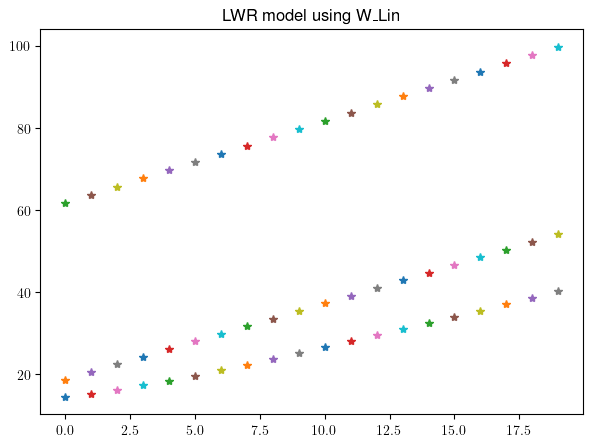

In [6]:
# plotting the solution, but it's better formatting in more clean way X

fig = plt.figure(figsize=(7,5))

for ts in range(0,len(tspan)):
    #print(f"\nts={ts}")
    for veh in range(0,N):
        #print(f"\tveh={veh}, X[{ts}][{veh}]={X[ts][veh]}")
        plt.plot(tspan[ts],X[ts][veh],'*')
        
plt.title(f"LWR model using W_{flag}")
plt.show()

### 2. Smart way

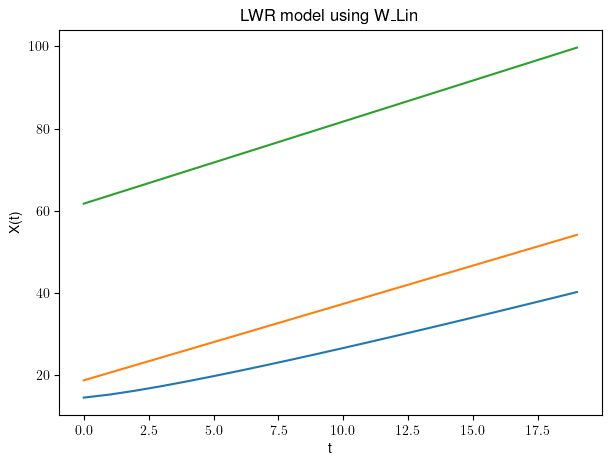

In [7]:
# smart way of plotting my ode sol

fig = plt.figure(figsize=(7,5))

for veh in range(0,N):
    plt.plot(tspan,X.T[veh]) # using X.T I have a list of N trajectories
    
plt.xlabel("t")
plt.ylabel("X(t)")
plt.title(f"LWR model using W_{flag}")
plt.show()

## `solve_ivp`

In [8]:
X2 = solve_ivp(LWR_model, [tspan[0], tspan[-1]], X0, method='RK45', t_eval=tspan, args=args)

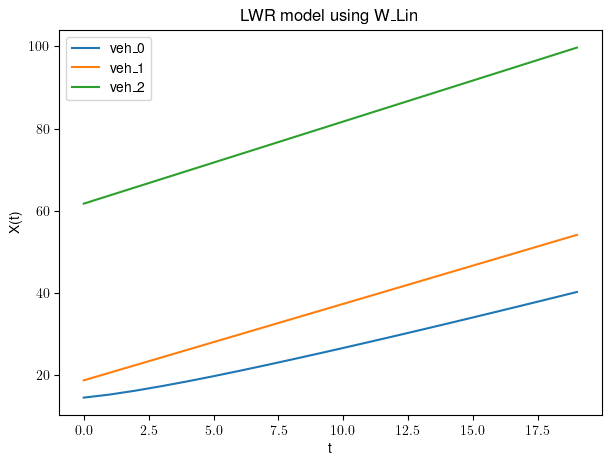

In [9]:
# smat way of plotting my ode sol
fig = plt.figure(figsize=(7,5))

for veh in range(0,N):
    plt.plot(tspan,X2.y[veh]) # using X.T I have a list of N trajectories
plt.xlabel("t")
plt.ylabel("X(t)")
plt.legend([f"veh_{i}" for i in range(0,N)])
plt.title(f"LWR model using W_{flag}")
plt.show()

## Comparison btw `odeint` and `solve_ivp`

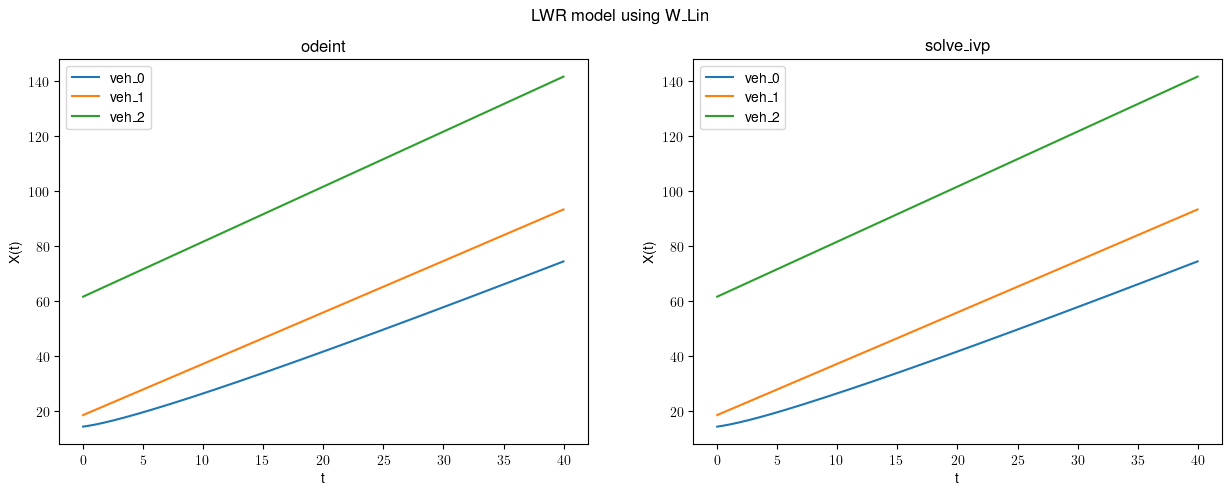

In [10]:
t_span = (0.0, 40.0)
tspan2 = np.arange(0.0, 40.0, 0.01)
 
result_odeint = odeint(LWR_model, X0, tspan2, args=(N, v0, L, flag), tfirst = True)
result_solve_ivp = solve_ivp(LWR_model, t_span, X0,method='RK45', t_eval=tspan2, args=args)

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# smat way of plotting my ode sol
for veh in range(0,N):
    ax1.plot(tspan2,result_odeint.T[veh]) # using X.T I have a list of N trajectories
    ax2.plot(tspan2,result_solve_ivp.y[veh]) # using X.T I have a list of N trajectories

ax1.set_title("odeint")
ax2.set_title("solve_ivp")
ax1.set_xlabel("t")
ax2.set_xlabel("t")
ax1.set_ylabel("X(t)")
ax2.set_ylabel("X(t)")
ax1.legend([f"veh_{i}" for i in range(0,N)])
ax2.legend([f"veh_{i}" for i in range(0,N)])

# Adding a title to the figure
fig.suptitle(f"LWR model using W_{flag}")

plt.show()